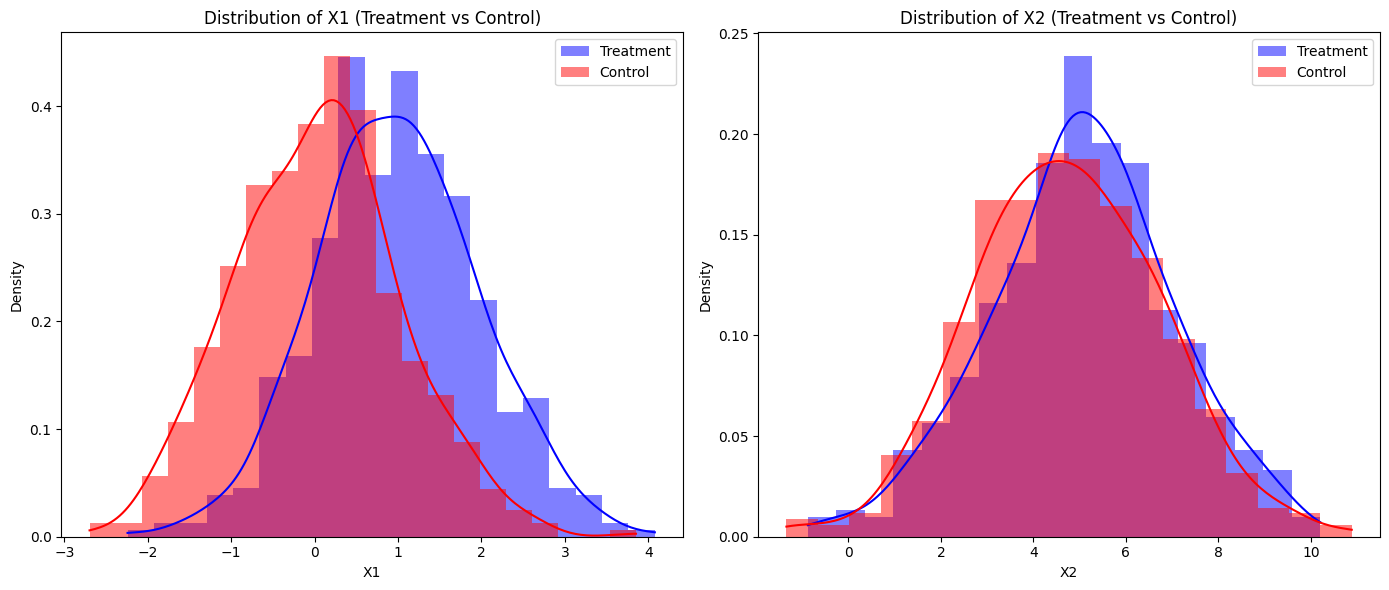

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设数据：我们有一个处理组 T=1 和对照组 T=0
# 生成假数据
np.random.seed(42)

# 创建一个数据框
n = 1000  # 样本大小
data = pd.DataFrame({
    'X1': np.random.normal(0, 1, n),  # 协变量X1
    'X2': np.random.normal(5, 2, n),  # 协变量X2
    'T': np.random.choice([0, 1], size=n)  # 处理组和对照组
})

# 假设在匹配之前，处理组和对照组在 X1 和 X2 上有不同的分布
data.loc[data['T'] == 1, 'X1'] += 2  # 处理组在X1上有2的偏移
data.loc[data['T'] == 0, 'X2'] -= 1  # 对照组在X2上有1的偏移

# 匹配后的数据（模拟匹配后，处理组和对照组的分布差异已缩小）
# 假设这里已经进行了匹配，处理后数据的分布已经更为接近
data.loc[data['T'] == 1, 'X1'] -= 1  # 处理组X1的分布已经调整
data.loc[data['T'] == 0, 'X2'] += 0.5  # 对照组X2的分布也有所调整

# 绘制平衡图：通过比较处理组和对照组的协变量分布
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 绘制 X1 的分布
sns.histplot(data[data['T'] == 1]['X1'], kde=True, color='blue', label='Treatment', ax=axes[0], stat='density', linewidth=0)
sns.histplot(data[data['T'] == 0]['X1'], kde=True, color='red', label='Control', ax=axes[0], stat='density', linewidth=0)
axes[0].set_title('Distribution of X1 (Treatment vs Control)')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('Density')
axes[0].legend()

# 绘制 X2 的分布
sns.histplot(data[data['T'] == 1]['X2'], kde=True, color='blue', label='Treatment', ax=axes[1], stat='density', linewidth=0)
sns.histplot(data[data['T'] == 0]['X2'], kde=True, color='red', label='Control', ax=axes[1], stat='density', linewidth=0)
axes[1].set_title('Distribution of X2 (Treatment vs Control)')
axes[1].set_xlabel('X2')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()
